In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization

from tensorflow.keras.datasets import mnist

In [2]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()   

print('x_train.shape = ', x_train.shape, ', t_train.shape = ', t_train.shape)
print('x_test.shape = ', x_test.shape, ', t_test.shape = ', t_test.shape)

11501568/11490434 [==============================] - 1s 0us/step
x_train.shape =  (60000, 28, 28) , t_train.shape =  (60000,)
x_test.shape =  (10000, 28, 28) , t_test.shape =  (10000,)


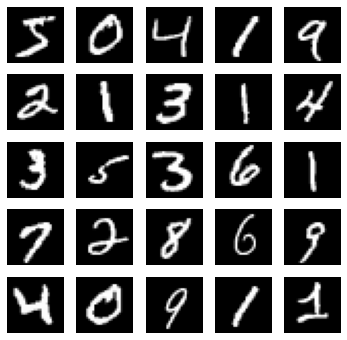

In [4]:
import matplotlib.pyplot as plt

# 48개의 이미지 출력
plt.figure(figsize=(6, 6))  # (6,1), (12,1), (12,6), (6,6) 등으로 다양하게 해본다

for index in range(25):    # 25 개 이미지 출력

    plt.subplot(5, 5, index + 1)  # 5행 5열 
    plt.imshow(x_train[index], cmap='gray')    # 1행 1열 -> 1행 2열 -> ...-> 1행 5열 -> 2행 1열 -> ...
    plt.axis('off')    

plt.show()

In [5]:
# x_train, x_test 값 범위를 0 ~ 1 사이로 정규화

x_train = x_train / 255.0
x_test = x_test / 255.0

Dropout(0.25)

In [62]:
model = Sequential()      # model 생성

model.add(Flatten(input_shape=(28, 28, 1)))  

model.add(Dense(100, activation='relu'))    

model.add(BatchNormalization())  # BatchNormalization() 추가

model.add(Dense(10, activation='softmax'))

In [63]:
from tensorflow.keras.optimizers import SGD

model.compile(optimizer=SGD(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 100)               78500     
                                                                 
 batch_normalization_2 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dense_19 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,910
Trainable params: 79,710
Non-trainable params: 200
_________________________________________________________________


In [64]:
hist = model.fit(x_train, t_train, epochs=50, validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4178 - accuracy: 0.8793 - val_loss: 0.2315 - val_accuracy: 0.9352
Epoch 2/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2332 - accuracy: 0.9336 - val_loss: 0.1806 - val_accuracy: 0.9498
Epoch 3/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1848 - accuracy: 0.9488 - val_loss: 0.1573 - val_accuracy: 0.9549
Epoch 4/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1569 - accuracy: 0.9568 - val_loss: 0.1407 - val_accuracy: 0.9616
Epoch 5/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1361 - accuracy: 0.9614 - val_loss: 0.1278 - val_accuracy: 0.9632
Epoch 6/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1201 - accuracy: 0.9666 - val_loss: 0.1189 - val_accuracy: 0.9653
Epoch 7/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1102 - accuracy: 0.9701 - val_loss: 0.1137 - val_accuracy:

In [65]:
# test data 이용하여 정확도 검증

model.evaluate(x_test, t_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0861 - accuracy: 0.9760


[0.08611170202493668, 0.9760000109672546]

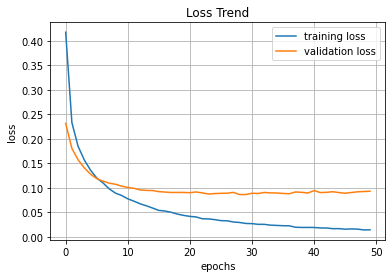

In [66]:
# 손실함수 그래프

plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

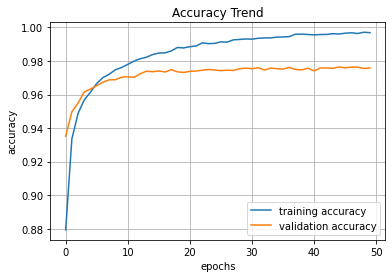

In [67]:
# 정확도 함수 그래프

plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='training accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()